In [1]:
import seaborn as sns
import matplotlib as plt 
import pandas as pd 
import numpy as np

In [3]:
cand=pd.read_csv(r"D:\ML\candyhierarchy2017.csv",encoding='ISO-8859-1')

In [4]:
cand.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [5]:
cand.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [6]:
cand.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [7]:
cand['Q10: DRESS'].isna().sum()

744

In [8]:
cand['Q11: DAY'].isna().sum()

725

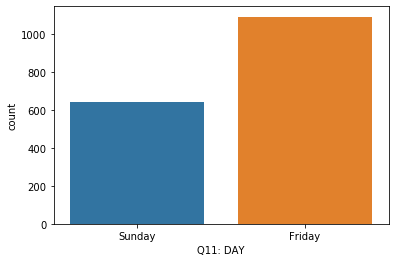

In [9]:
sns.countplot(cand['Q11: DAY'])

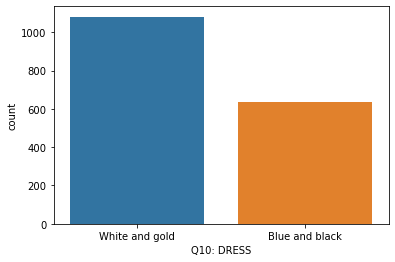

In [10]:
sns.countplot(cand['Q10: DRESS'])

###### Most of columns are objects except these 5 columns

In [11]:
cand.shape

(2460, 120)

In [12]:
cand.T.duplicated().sum()

0

In [13]:
cand.duplicated().sum()

0

No Duplication in rows or columns

In [14]:
cand.isna().sum().sort_values(ascending=False)

Unnamed: 113                                                                   2451
Q12: MEDIA [Yahoo]                                                             2393
Q12: MEDIA [Daily Dish]                                                        2375
Q12: MEDIA [ESPN]                                                              2361
Q9: OTHER COMMENTS                                                             2074
Q8: DESPAIR OTHER                                                              1743
Q7: JOY OTHER                                                                  1549
Q12: MEDIA [Science]                                                           1098
Q6 | JoyJoy (Mit Iodine!)                                                      1026
Q6 | Maynards                                                                  1024
Q6 | Reggie Jackson Bar                                                        1014
Q6 | Bonkers (the board game)                                               

In [15]:
cand=cand.iloc[:,1:6]

In [16]:
cand.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC"
0,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM
2,NaN,Male,49,USA,Virginia
3,No,Male,40,us,or
4,No,Male,23,usa,exton pa


In [17]:
Null_rows=cand.T.isna().sum().sort_values(ascending=False)

In [18]:
Null_rows=Null_rows.loc[Null_rows>2]

In [19]:
Null_rows.index

Int64Index([   0, 1295,  693, 2352,  100, 1095, 1273, 1076, 2316,  546,  734,
            2431, 1895, 1345, 1004, 1599, 1972,  931,  838, 1510,   36,  187,
            2048,  644, 2440, 1706,  704,  708, 2450, 1014, 1193, 1161,  845,
             904,  149, 2379, 2377,  869, 2358,  855,  566,  352,  114,  121,
            1870, 1650, 1452,  350, 1900, 1907, 1798,  760, 1388, 1609,    5,
            1487, 1977,  601,  759,  656],
           dtype='int64')

In [20]:
cand=cand.drop(Null_rows.index,axis=0)

#### checking  max of missing values in row again

In [21]:
max(cand.T.isna().sum())

2

In [22]:
cand['Q4: COUNTRY'].value_counts()

USA                          699
United States                495
usa                          217
Canada                       179
Usa                          139
US                           126
USA                           73
United States of America      57
us                            40
united states                 38
United States                 37
canada                        34
United states                 19
Us                            16
United Kingdom                13
UK                            13
United States of America      11
U.S.                           8
Canada                         8
U.S.A.                         7
Germany                        7
Netherlands                    6
united states of america       5
Australia                      5
Japan                          5
Unites States                  4
Scotland                       4
US of A                        4
Mexico                         4
america                        4
          

In [23]:
cand['Q4: COUNTRY'] = cand['Q4: COUNTRY'].str.lower()

In [24]:
cand['Q4: COUNTRY'].value_counts()

usa                                                                     1056
united states                                                            552
canada                                                                   215
us                                                                       182
usa                                                                       74
united states of america                                                  62
united states                                                             38
uk                                                                        17
united kingdom                                                            14
united states of america                                                  11
u.s.                                                                      11
germany                                                                   10
canada                                                                     9

In [25]:
mapping={'new york':'usa','n. america':'usa','ahem....amerca':'usa',"'merica":'usa','u s':'usa',
        'new jersey':'usa','usausausa':'usa','alaska':'usa','a':'usa','ussa':'usa','i pretend to be from canada, but i am really from the united states.':'usa',
        'united states':'usa','u.s.':'usa','united state':'usa','us of a':'usa','unites states':'usa','america':'usa',
        'u.s.a.':'usa','u.s.':'usa','united states of america':'usa','united states':'usa','us':'usa','usa ':'usa','united states of america':'usa'
        ,"usa! usa! usa!" :'usa','united states ':'usa','united states of america ':'usa','united stated':'usa',
        'the united states':'usa','united ststes':'usa','united statea':'usa','u s a':'usa','california':'usa',
        'u s a ':'usa','unied states':'usa','united sates':'usa','murica':'usa','usa usa usa!!!!':'usa','unite states':'usa','u s a':'usa','murrika':'usa'
        ,'canada ':'canada','united kingdom':'uk','u.k.':'uk','uk ':'uk','england':'uk','endland':'uk','united statss':'usa',
        'united staes':'usa','united statss':'usa','canae':'canada','u.s. ':'usa','united statss':'usa','united statss':'usa','u.k. ':
         'uk','unhinged states':'usa','canada`':'canada','usa? hard to tell anymore..':'usa','can':'canada','usaa':'usa','trumpistan':'usa',
         'narnia':'usa',"the united states of america":'usa','ud':'uk'
        }

In [26]:
cand['Q4: COUNTRY'] = cand['Q4: COUNTRY'].replace(mapping)

In [27]:
cand['Q4: COUNTRY'].value_counts()

usa                               2046
canada                             227
uk                                  36
germany                             10
australia                            7
netherlands                          6
japan                                5
scotland                             4
mexico                               4
ireland                              3
switzerland                          3
france                               2
denmark                              2
china                                2
hong kong                            2
sweden                               2
usas                                 1
finland                              1
35                                   1
scotland                             1
spain                                1
the netherlands                      1
32                                   1
uae                                  1
south africa                         1
korea                    

In [28]:
corr=['46','45','32','35']
for i in corr :
    cand.loc[cand['Q4: COUNTRY']==i,'Q3: AGE']=int(i)
    cand.loc[cand['Q4: COUNTRY']==i,'Q4: COUNTRY']='usa'


In [29]:
cand.loc[cand['Q4: COUNTRY']=="north carolina ",'Q4: COUNTRY']='usa'
cand.loc[cand['Q4: COUNTRY']=="north carolina ",'Q5: STATE, PROVINCE, COUNTY, ETC']='north carolina'

In [30]:
drop=[2214,2212,638,2413,2376]
cand.drop(drop,axis=0,inplace=True)

In [31]:
cand['Q3: AGE'].unique()

array(['44', '49', '40', '23', '53', '33', '43', '56', '64', '37', '59',
       '48', '54', '36', '45', '25', '34', '35', '38', '58', '50', '47',
       '16', '52', '63', '65', '41', '27', '31', '61', '46', '42', '62',
       '29', '39', '32', '28', '69', '67', '30', '22', '26', '51', '70',
       '24', '18', 35, '19', 'Old enough', '57', '60', '66', '12', 'Many',
       '55', '72', '?', '21', '11', 'no', '9', '68', '20', nan, '6', '10',
       '71', '90', '13', '45-55', '312', 46, '99', '7', '88', 45, '39.4',
       '74', 32, '102', 'older than dirt', '17', '15', '8', '75', '5u',
       'Enough', 'See question 2', '24-50', '14', 'Over 50', '100', '76',
       '1000', 'sixty-nine', '46 Halloweens.', 'ancient', '77', 'OLD',
       'old', '73', '70 1/2', '4', '59 on the day after Halloween',
       'old enough', 'your mom', '60+'], dtype=object)

In [32]:
cand.loc[cand['Q3: AGE']=='older than dirt']

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC"
902,No,Female,older than dirt,usa,PA


In [33]:
age_map={'Old enough':'0','Over 50':'0','OLD':'0','59 on the day after Halloween':'0','60+':'0','your mom':'0'
        ,'old':'0','See question 2':'0','Enough':'0','1000':'0','46 Halloweens.':'46','Many':'0','24-50':'0','sixty-nine':'69'
        ,'5u':'0','312':'0','old enough':'0','ancient':'0','45-55':'0','older than dirt':'0',np.nan:'0','no':'0','?':'0'
        ,'70 1/2':'0','39.4':'39'}

In [34]:
cand['Q3: AGE'] = cand['Q3: AGE'].replace(age_map)

In [35]:
cand['Q3: AGE'].fillna("0", inplace=True)
cand['Q2: GENDER'].fillna("I'd rather not say", inplace=True)

In [36]:
cand['Q3: AGE']=cand['Q3: AGE'].astype('float64')

#### zero means prefere not to say

In [37]:
cand['Q2: GENDER'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [38]:
cand['Q4: COUNTRY'].fillna('usa', inplace=True)

In [39]:
cand.isna().sum()

Q1: GOING OUT?                      83
Q2: GENDER                           0
Q3: AGE                              0
Q4: COUNTRY                          0
Q5: STATE, PROVINCE, COUNTY, ETC    41
dtype: int64

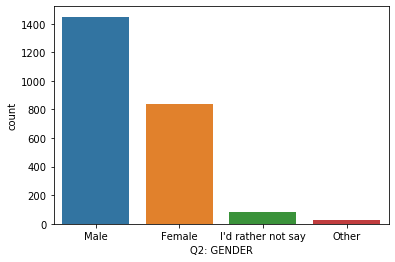

In [41]:
sns.countplot(cand['Q2: GENDER'])

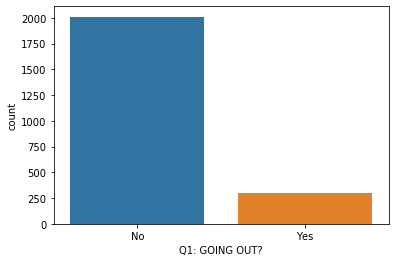

In [42]:
sns.countplot(cand['Q1: GOING OUT?'])

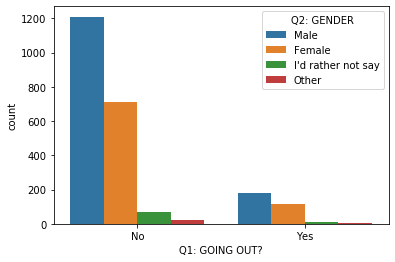

In [43]:
sns.countplot(x="Q1: GOING OUT?",data=cand,hue="Q2: GENDER")

In [44]:
cand.isna().sum()

Q1: GOING OUT?                      83
Q2: GENDER                           0
Q3: AGE                              0
Q4: COUNTRY                          0
Q5: STATE, PROVINCE, COUNTY, ETC    41
dtype: int64

In [45]:
cand['Q1: GOING OUT?'].isna().sum()

83

In [46]:
cand.index[cand['Q1: GOING OUT?'].isna()==True ]


Int64Index([   2,   44,   52,   63,   69,   75,   84,  110,  130,  134,  202,
             230,  236,  243,  333,  355,  370,  372,  373,  390,  424,  463,
             480,  504,  532,  598,  603,  612,  651,  730,  805,  823,  870,
             875,  911,  954,  957, 1029, 1056, 1096, 1123, 1162, 1203, 1241,
            1296, 1337, 1341, 1387, 1393, 1430, 1434, 1438, 1494, 1539, 1540,
            1565, 1605, 1754, 1772, 1774, 1871, 1879, 1921, 1938, 1942, 1959,
            1968, 1993, 2006, 2028, 2137, 2143, 2147, 2155, 2181, 2184, 2270,
            2288, 2343, 2356, 2361, 2386, 2446],
           dtype='int64')

In [47]:
cand.drop(cand.index[cand['Q1: GOING OUT?'].isna()==True ],axis=0,inplace=True)


In [48]:
cand.drop(cand.index[cand['Q5: STATE, PROVINCE, COUNTY, ETC'].isna()==True ],axis=0,inplace=True)